In [14]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)



In [34]:
activations = [
    # nn.Sigmoid,
    # nn.Tanh,
    # nn.Hardsigmoid,
    # nn.Hardtanh,
    nn.ReLU,
    # nn.LeakyReLU,
    # nn.ELU,
    # nn.Softplus,
    # nn.GELU,
]

class NeuralNetwork(nn.Module):
    def __init__(self, activation):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            activation(),
            nn.Linear(512, 512),
            activation(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

models = [NeuralNetwork(activ) for activ in activations]

Epoch 1
-------------------------------
loss: 2.253252  [    0/60000]   [32/64]
loss: 2.246472  [ 6400/60000]   [34/64]
loss: 2.248913  [12800/60000]   [35/64]
loss: 2.225269  [19200/60000]   [34/64]
loss: 2.225507  [25600/60000]   [43/64]
loss: 2.223863  [32000/60000]   [33/64]
loss: 2.195054  [38400/60000]   [43/64]
loss: 2.229855  [44800/60000]   [34/64]
loss: 2.196735  [51200/60000]   [35/64]
loss: 2.179539  [57600/60000]   [47/64]
Test Error: 
 Accuracy: 64.7%, Avg loss: 2.186033 

Epoch 2
-------------------------------
loss: 2.189488  [    0/60000]   [42/64]
loss: 2.175921  [ 6400/60000]   [42/64]
loss: 2.186706  [12800/60000]   [38/64]


KeyboardInterrupt: 

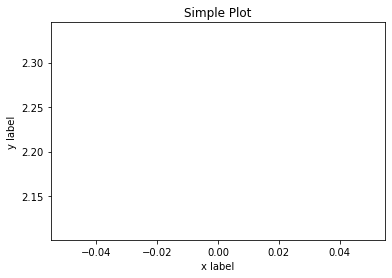

In [36]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    train_loss = 0
    train_acc = 0
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        
        loss = loss_fn(pred, y)
        train_loss += loss.item()
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        out_t = pred.argmax(dim=1) #取出预测的最大值
        num_correct = (out_t == y).sum().item()
        train_acc += num_correct

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]   [{num_correct}/{out_t.shape[0]}]")
    
    return train_loss / len(dataloader), train_acc / len(dataloader.dataset)
        


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return test_loss, correct

learning_rate = 1e-3
batch_size = 64

loss_fn = nn.CrossEntropyLoss()

epochs = 10

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.

for model in models:
    train_losses = []
    train_acces = []
    test_losses = []
    test_acces = []  
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    for t in range(epochs):
        print(f"Epoch {t+1}\n-------------------------------")
        train_loss, train_acc = train_loop(train_dataloader, model, loss_fn, optimizer)
        test_loss, test_acc = test_loop(test_dataloader, model, loss_fn)
        train_losses.append(train_loss)
        train_acces.append(train_acc)
        test_losses.append(test_loss)
        test_acces.append(test_acc)
        ax.plot(np.arange(len(train_losses)), train_losses, label='sigmoid')

print("Done!")


In [12]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

learning_rate = 1e-3
batch_size = 64
epochs = 5

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.292503  [    0/60000]
loss: 2.296124  [ 6400/60000]
loss: 2.287753  [12800/60000]
loss: 2.272686  [19200/60000]
loss: 2.273002  [25600/60000]
loss: 2.273609  [32000/60000]
loss: 2.262012  [38400/60000]
loss: 2.275711  [44800/60000]
loss: 2.252830  [51200/60000]
loss: 2.245801  [57600/60000]
Test Error: 
 Accuracy: 53.6%, Avg loss: 2.245907 

Epoch 2
-------------------------------
loss: 2.241593  [    0/60000]
loss: 2.240510  [ 6400/60000]
loss: 2.247666  [12800/60000]
loss: 2.205970  [19200/60000]
loss: 2.218712  [25600/60000]
loss: 2.216462  [32000/60000]
loss: 2.195923  [38400/60000]
loss: 2.220791  [44800/60000]
loss: 2.182974  [51200/60000]
loss: 2.177792  [57600/60000]
Test Error: 
 Accuracy: 60.9%, Avg loss: 2.171800 

Epoch 3
-------------------------------
loss: 2.165527  [    0/60000]
loss: 2.154490  [ 6400/60000]
loss: 2.184784  [12800/60000]
loss: 2.100370  [19200/60000]
loss: 2.130687  [25600/60000]
loss: 2.121399  [32000/600